# 03.01.02 KoNLPy 한국어 처리 패키지

    - 샘플 말뭉치
        - kolaw : 헌법 말뭉치
        - kobill : 법안 말뭉치
        
    - 한글 형태소 분석기
        - KoNLPy는 다양한 형태소 분석, 태깅 라이브러리를 쉽게 사용할 수 있도록 모아놓음
        
        - nouns : 명사 추출 / morphs : 형태소 추출 / pos : 품사 부착

# 1. KoNLPy 실습

**step 1) 헌법 corpus**

In [2]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [3]:
c = kolaw.open('constitution.txt').read()
print(c[:450])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       


**step 2) 법안 corpus**

In [4]:
from konlpy.corpus import kobill
kobill.fileids()

['1809896.txt',
 '1809897.txt',
 '1809895.txt',
 '1809894.txt',
 '1809890.txt',
 '1809891.txt',
 '1809893.txt',
 '1809892.txt',
 '1809899.txt',
 '1809898.txt']

In [5]:
d = kobill.open('1809896.txt').read()
print(d[:450])

행정절차법 일부개정법률안

(유선호의원 대표발의 )

 의 안
 번 호

9896

발의연월일 : 2010.  11.  15.

발  의  자 : 유선호․강기갑․김효석  

최문순ㆍ최재성ㆍ조영택  

김성곤ㆍ문학진ㆍ백재현  

송민순ㆍ양승조ㆍ신낙균  

조배숙ㆍ박은수ㆍ정동영  

김춘진ㆍ김재윤ㆍ우윤근  

이성남ㆍ박영선 의원

             (20인)

제안이유

  현행법은 입법예고와 행정예고를 통하여 정책 결정 과정에 국민 참

여의 절차를 규정하고 있기는 하나 실제 정책 결정·집행·평가의 단계

에서 근본적인 국민 참여 규정은 거의 없어 위임입법에 의하여 정책 

결정 및 집행 권한이 부여되는 문제점이 있음.

  따라서 입법예고 이전의 국민적 협의절차와 재입법예고 규정 등을 

신설하고, 당사자 등의 개념을 명확히 하여 당사자의 신청에 의한 청

문의 기회를 보장하는 한편, 법령


**step 3) 형태소 분석기 생성**

In [6]:
from konlpy.tag import *

In [7]:
hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

In [9]:
# 다음 형태소 분석기는 자바 등의 연결에 따라 안될 수도 있다.
komoran = Komoran()

**step 4) 명사 추출**

    - nouns 메서드

In [11]:
hannanum.nouns(d[:40])

['행정절차법', '일부개정법률안', '(유선호의원', '대표발', '의', '번']

In [12]:
kkma.nouns(d[:40])

['행정',
 '행정절차법',
 '절차법',
 '일부',
 '일부개정법률안',
 '개정',
 '법률안',
 '유',
 '유선호의원',
 '선호',
 '의원',
 '대표',
 '대표발의',
 '발의',
 '의',
 '안',
 '호']

**step 5) 형태소 추출**

    - morphs 메서드

In [13]:
hannanum.morphs(d[:40])

['행정절차법', '일부개정법률안', '(유선호의원', '대표발', '의', ')', '의', '안', '번', '호']

In [14]:
kkma.morphs(d[:40])

['행정',
 '절차법',
 '일부',
 '개정',
 '법률안',
 '(',
 '유',
 '선호',
 '의원',
 '대표',
 '발의',
 ')',
 '의',
 '안',
 '벌',
 'ㄴ',
 '호']

**step 6) 품사 부착**

    - pos 명령으로 품사 부착
    - 한국어 품사 태그 세트 : 형태소 분석기 마다 차이가 있음. 각 형태소 분석기 문서 참조 필요
    - 부착되는 품사 태그의 기호와 의미 : tagset 속성으로 확인

In [16]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [22]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [18]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [19]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

**step 7) 빈도 분석**

    - NLTK 기능으로 한국어 빈도 분석 가능

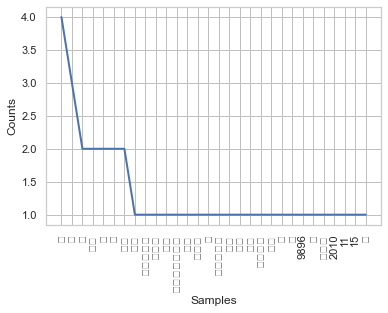

In [25]:
from nltk import Text

kolaw = Text(kkma.nouns(d))
kolaw.plot(30)

In [26]:
import matplotlib.pyplot as plt

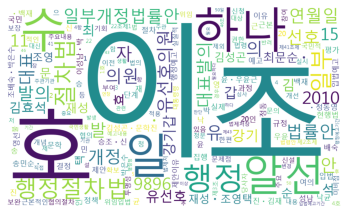

In [32]:
path = "/Users/kimjeongseob/Desktop/기타/VistaFont_KOR/malgun.ttf"
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 600, background_color = 'white', font_path = path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis('off')
plt.show()